<a href="https://colab.research.google.com/github/foglianon/ProyectoFinalCoderHouse/blob/main/PreEntrega_Nicolas_Fogliano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud

## **Preguntas de interes**

* Que pais ofrece mas alojamientos?
* Que ciudad tiene la media del precio mas baja? Cual tiene la mas alta?
* Como varia el precio en base a la cantidad de dormitorios?
* Cual es la ciudad que cuenta con mayor cantidad de reviews?
* Cual es la ciudad que cuenta con mayor cantidad de reviews positivas?



# Data Acquisition

In [40]:
url = 'https://raw.githubusercontent.com/foglianon/PruebaGit/main/Dataset/Airbnb_Data.csv'
df = pd.read_csv(url,sep=',')
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [41]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [42]:
df.shape

(74111, 29)

La base utilizada tiene 74111 instancias y 29 features

In [43]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

# Data Wrangling

In [44]:
df.number_of_reviews.sum()

1548962

La cantidad total de reviews en el dataset es de: 1.548.962

In [45]:
# Verificar cantidad de nulos por cada columna
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [46]:
# Verificar porcentaje de nulos
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Nulos': df.isnull().sum(),
                                 'Porcentaje_Missing': percent_missing})
missing_value_df

Nulos  Porcentaje_Missing
id                          0            0.000000
log_price                   0            0.000000
property_type               0            0.000000
room_type                   0            0.000000
amenities                   0            0.000000
accommodates                0            0.000000
bathrooms                 200            0.269865
bed_type                    0            0.000000
cancellation_policy         0            0.000000
cleaning_fee                0            0.000000
city                        0            0.000000
description                 0            0.000000
first_review            15864           21.405729
host_has_profile_pic      188            0.253674
host_identity_verified    188            0.253674
host_response_rate      18299           24.691341
host_since                188            0.253674
instant_bookable            0            0.000000
last_review             15827           21.355804
latitude                    0            0.000000
longitude                   0            0.000000
name                        0            0.000000
neighbourhood            6872            9.272578
number_of_reviews           0            0.000000
review_scores_rating    16722           22.563452
thumbnail_url            8216           11.086074
zipcode                   966            1.303450
bedrooms                   91            0.122789
beds                      131            0.176762

In [47]:
#Quitar los registros donde la cantidad de baños, dormitorios y camas son nulos
df = df[df["bathrooms"].notna()]
df = df[df["bedrooms"].notna()]
df = df[df["beds"].notna()]
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15782
host_has_profile_pic        187
host_identity_verified      187
host_response_rate        18208
host_since                  187
instant_bookable              0
last_review               15745
latitude                      0
longitude                     0
name                          0
neighbourhood              6847
number_of_reviews             0
review_scores_rating      16637
thumbnail_url              8155
zipcode                     951
bedrooms                      0
beds                          0
dtype: int64

* Dado que la cantidad de registros donde no hay datos en cantidad de baños, camas y dormitorios es menor al 0,5% de los registros totales, se decidio eliminar esos registros del dataset

In [48]:
# Verificar duplicados
df.duplicated().unique()

array([False])



*   No se encontraron registros duplicados en el dataset



In [49]:
#Agregar columna con cantidad de amenities
df['amenities_count'] = df['amenities'].apply(lambda x: x.count(',')+1)
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   longitude  \
0  Real Bed              strict          True  ...  -73.991617   
1  Real Bed              strict          True  ...  -73.989040   
2  Real Bed            moderate          True  ...  -73.943756   
3  Real Bed            flexible          True  ... -122.431619   
4  Real Bed            moderate          True  ...  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms beds  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0  1.0   
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0  3.0   
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0  3.0   
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0  2.0   
4                                                NaN    20009      0.0  1.0   

   amenities_count  
0                9  
1               15  
2               19  
3               15  
4               12  

[5 rows x 30 columns]



*   Se incorpora una nueva columna con la cantidad de amenities contando los separadores de comas en la columna de amenities




In [50]:

# Filtrar filas donde el campo 'neighbourhood' es null (NaN)
df_null_neighbourhood = df[df['neighbourhood'].isnull()]

# Mostrar el DataFrame filtrado
df_null_neighbourhood[['id','log_price','city','latitude','longitude','neighbourhood']]


id  log_price     city   latitude   longitude neighbourhood
6      11825529   4.418841       LA  33.980454 -118.462821           NaN
9       5385260   3.583519       LA  33.992563 -117.895997           NaN
14       583490   4.955827       LA  33.778526 -118.145926           NaN
26     19407360   4.553877       LA  34.100686 -118.364204           NaN
28       851978   5.192957       LA  34.051584 -118.242923           NaN
...         ...        ...      ...        ...         ...           ...
74098   8342838   4.553877       LA  34.104450 -118.330558           NaN
74099   4615631   4.276666       LA  34.096308 -118.348016           NaN
74101  18077717   4.584967       LA  34.020021 -118.498239           NaN
74104  14934112   4.356709  Chicago  41.909067  -87.623046           NaN
74105    808802   4.248495       LA  34.092640 -118.343921           NaN

[6847 rows x 6 columns]



*   Se buscan los registros donde el barrio(neighbourhood) se encuentra vacio para identificar si tienen completo la ciudad



In [51]:
df_null_neighbourhood.city.unique()

array(['LA', 'DC', 'Chicago', 'SF', 'NYC'], dtype=object)

* Al buscar los valores unicos de ciudad dentro del dataset con barrios nulos, encontramos que no hay ciudades nulas  

In [52]:
for index, row in df.iterrows():
    # Verificar si el valor en la columna 'neighbourhood' es vacío
    if pd.isnull(row['neighbourhood']):
      if row['city'] == 'NYC':
        ciudad = 'Nueva York'
        df.at[index, 'neighbourhood'] = ciudad
      elif row['city'] == 'SF':
        ciudad = 'San Francisco'
        df.at[index, 'neighbourhood'] = ciudad
      elif row['city'] == 'DC':
        ciudad = 'Washington'
        df.at[index, 'neighbourhood'] = ciudad
      elif row['city'] == 'LA':
        ciudad = 'Los Angeles'
        df.at[index, 'neighbourhood'] = ciudad
      else:
        ciudad = row['city']
        df.at[index, 'neighbourhood'] = ciudad



* Se completan los barrios nullos por el nombre de la ciudad y posteriormente se valida si fueron reemplazados correctamente

In [53]:
# Filtrar filas donde el campo 'neighbourhood' es null (NaN)
df_null_neighbourhood = df[df['neighbourhood'].isnull()]

# Mostrar el DataFrame filtrado
df_null_neighbourhood[['id','log_price','latitude','longitude','neighbourhood']]

Empty DataFrame
Columns: [id, log_price, latitude, longitude, neighbourhood]
Index: []

# Exploratory Data Analysis (EDA)

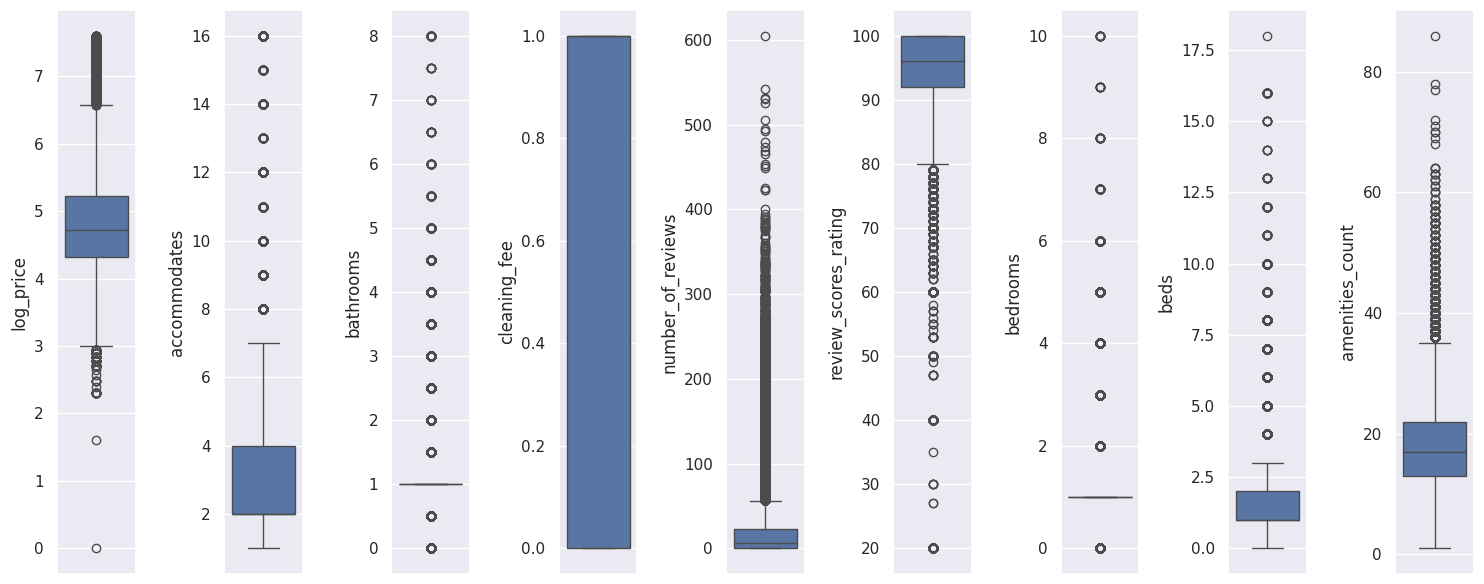

In [56]:
variables = ['log_price',
       'accommodates', 'bathrooms',
       'cleaning_fee', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds','amenities_count']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)

plt.tight_layout()



*   Analizando los boxplots se encontro que hay registros con 0 camas pero la capacidad es para 1 o 2 personas por ese motivo se reemplazan en esos 4 registros la cantidad de camas a 1

*   Otro outlier que encontramos es en el caso de log_price donde el precio es 0. En este caso identificamos ese unico registro y con los valores de cantidad de baños, dormitorios, camas y ciudad obtenemos la media para reemplazar el valor 0



In [57]:
df.query('beds == 0')

id  log_price property_type        room_type  \
13672   7922378   5.129899     Apartment  Entire home/apt   
24062  20269147   5.783825         House  Entire home/apt   
39057   8684344   4.691348     Apartment  Entire home/apt   
55285  15419976   5.991465         House  Entire home/apt   

                                               amenities  accommodates  \
13672  {TV,Internet,"Wireless Internet",Kitchen,Washe...             2   
24062  {TV,Internet,"Wireless Internet","Air conditio...             2   
39057  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
55285  {TV,Internet,"Wireless Internet","Air conditio...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   longitude  \
13672        1.0  Real Bed              strict          True  ... -122.426718   
24062        1.0  Real Bed     super_strict_30         False  ...  -73.973383   
39057        1.0  Real Bed              strict          True  ...  -71.081258   
55285        1.0  Real Bed     super_strict_30         False  ...  -73.972833   

                                          name neighbourhood  \
13672         COZY PRIVATE Bedroom in 2Br Apt!    Cow Hollow   
24062  Stay at Midtown 45 in the heart of NYC!  Midtown East   
39057                  Posh Studio in Back Bay      Back Bay   
55285     Visit the Big Apple with Midtown 45!  Midtown East   

      number_of_reviews review_scores_rating  \
13672                 0                  NaN   
24062                 0                  NaN   
39057                53                 94.0   
55285                 0                  NaN   

                                           thumbnail_url zipcode bedrooms  \
13672  https://a0.muscache.com/im/pictures/48546368/e...   94123      1.0   
24062  https://a0.muscache.com/im/pictures/9c51b39d-2...   10017      0.0   
39057  https://a0.muscache.com/im/pictures/ab9d2f1d-e...   02116      0.0   
55285  https://a0.muscache.com/im/pictures/464cf3aa-4...   10017      1.0   

      beds  amenities_count  
13672  0.0                6  
24062  0.0                9  
39057  0.0               31  
55285  0.0                9  

[4 rows x 30 columns]

In [58]:
df.beds = df.beds.replace({0:1})
df.query('id in [7922378,20269147,8684344,15419976]')

id  log_price property_type        room_type  \
13672   7922378   5.129899     Apartment  Entire home/apt   
24062  20269147   5.783825         House  Entire home/apt   
39057   8684344   4.691348     Apartment  Entire home/apt   
55285  15419976   5.991465         House  Entire home/apt   

                                               amenities  accommodates  \
13672  {TV,Internet,"Wireless Internet",Kitchen,Washe...             2   
24062  {TV,Internet,"Wireless Internet","Air conditio...             2   
39057  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
55285  {TV,Internet,"Wireless Internet","Air conditio...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   longitude  \
13672        1.0  Real Bed              strict          True  ... -122.426718   
24062        1.0  Real Bed     super_strict_30         False  ...  -73.973383   
39057        1.0  Real Bed              strict          True  ...  -71.081258   
55285        1.0  Real Bed     super_strict_30         False  ...  -73.972833   

                                          name neighbourhood  \
13672         COZY PRIVATE Bedroom in 2Br Apt!    Cow Hollow   
24062  Stay at Midtown 45 in the heart of NYC!  Midtown East   
39057                  Posh Studio in Back Bay      Back Bay   
55285     Visit the Big Apple with Midtown 45!  Midtown East   

      number_of_reviews review_scores_rating  \
13672                 0                  NaN   
24062                 0                  NaN   
39057                53                 94.0   
55285                 0                  NaN   

                                           thumbnail_url zipcode bedrooms  \
13672  https://a0.muscache.com/im/pictures/48546368/e...   94123      1.0   
24062  https://a0.muscache.com/im/pictures/9c51b39d-2...   10017      0.0   
39057  https://a0.muscache.com/im/pictures/ab9d2f1d-e...   02116      0.0   
55285  https://a0.muscache.com/im/pictures/464cf3aa-4...   10017      1.0   

      beds  amenities_count  
13672  1.0                6  
24062  1.0                9  
39057  1.0               31  
55285  1.0                9  

[4 rows x 30 columns]

In [59]:
df_null_price = df.query('log_price == 0')
df_null_price[['id','log_price','room_type','bathrooms','bedrooms','beds','city']]

id  log_price    room_type  bathrooms  bedrooms  beds city
11632  17972519        0.0  Shared room        1.0       1.0   1.0  NYC

In [36]:
# Filtrar el DataFrame con las condiciones especificadas
filtered_df = df[(df['log_price'] > 0) & (df['beds'] == 1) & (df['bedrooms'] == 1) & (df['bathrooms'] == 1) & (df['city'] == 'NYC')]

# Calcular la media de una columna específica, por ejemplo 'log_price'
mean_log_price = filtered_df['log_price'].mean()
print(f"La media de 'log_price' para los cuartos con una cama y un baño en NYC es: {mean_log_price}")

# Reemplazar los valores 0 en 'log_price' con la media calculada
df.loc[df['log_price'] == 0, 'log_price'] = mean_log_price

La media de 'log_price' para los cuartos con una cama y un baño en NYC es: 4.494928618548622


In [37]:
df_null_price = df.query('id == 17972519')
df_null_price[['id','log_price','room_type','bathrooms','bedrooms','beds','city']]

id  log_price    room_type  bathrooms  bedrooms  beds city
11632  17972519   4.494929  Shared room        1.0       1.0   1.0  NYC

In [60]:
#Filtrado de dataframe para excluir la columna ID, Latitud y Longitud
filtered_df = df.loc[:, df.columns.isin(['log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds','amenities_count'])]

Se excluye la columna ID para el analisis de correlacion dado que es irrelevante para el analisis de correlacion

In [61]:
filtered_df.corr(numeric_only=True)

log_price  accommodates  bathrooms  cleaning_fee  \
log_price              1.000000      0.567935   0.355623      0.111117   
accommodates           0.567935      1.000000   0.505894      0.181804   
bathrooms              0.355623      0.505894   1.000000      0.053704   
cleaning_fee           0.111117      0.181804   0.053704      1.000000   
number_of_reviews     -0.031987      0.042455  -0.041411      0.110460   
review_scores_rating   0.090556     -0.018036   0.010608      0.034625   
bedrooms               0.473308      0.709563   0.589900      0.105129   
beds                   0.442375      0.810857   0.525592      0.131492   
amenities_count        0.194637      0.264255   0.159900      0.239246   

                      number_of_reviews  review_scores_rating  bedrooms  \
log_price                     -0.031987              0.090556  0.473308   
accommodates                   0.042455             -0.018036  0.709563   
bathrooms                     -0.041411              0.010608  0.589900   
cleaning_fee                   0.110460              0.034625  0.105129   
number_of_reviews              1.000000              0.011672 -0.035050   
review_scores_rating           0.011672              1.000000  0.010699   
bedrooms                      -0.035050              0.010699  1.000000   
beds                           0.031782             -0.027630  0.709446   
amenities_count                0.181779              0.133983  0.180890   

                          beds  amenities_count  
log_price             0.442375         0.194637  
accommodates          0.810857         0.264255  
bathrooms             0.525592         0.159900  
cleaning_fee          0.131492         0.239246  
number_of_reviews     0.031782         0.181779  
review_scores_rating -0.027630         0.133983  
bedrooms              0.709446         0.180890  
beds                  1.000000         0.230080  
amenities_count       0.230080         1.000000

<Axes: >

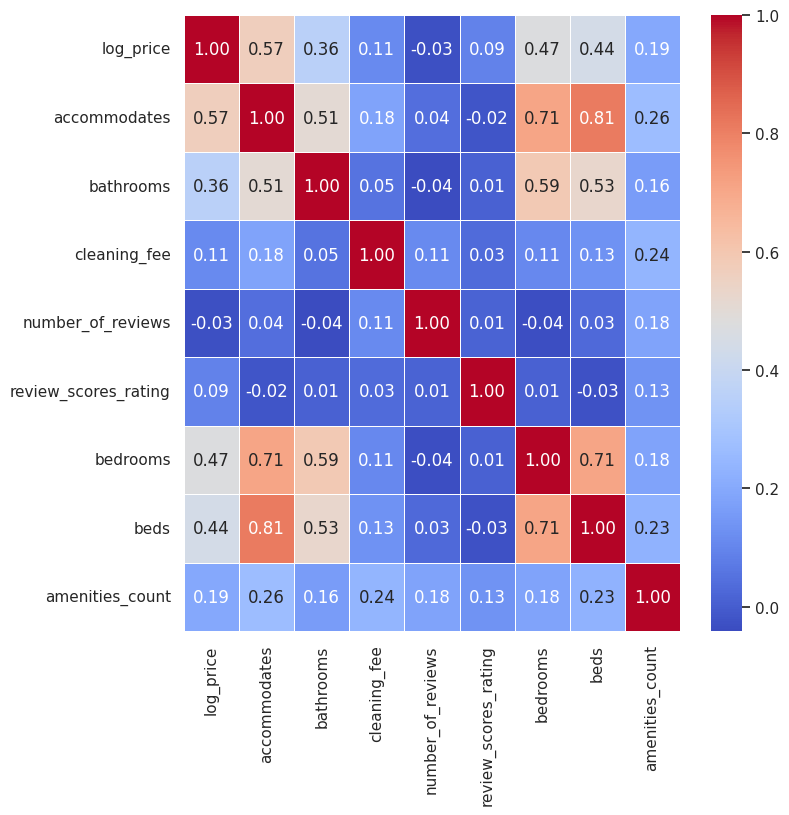

In [62]:
sns.heatmap(filtered_df.corr(numeric_only=True),cmap= 'coolwarm', annot=True, linewidth=.5, fmt=".2f")


1.   ***Variables con Alta Correlación Positiva:***



  *   **accommodates y beds**: Se observó una fuerte correlación positiva (coeficiente de correlación: 0.810857). Esto indica que a medida que la capacidad de alojamiento (accommodates) aumenta, el número de camas (beds) tiende a aumentar también, sugiriendo una relación directa significativa entre estas dos variables.
  *   **accommodates y bedrooms**: Se encontró una correlación positiva alta (coeficiente de correlación: 0.709563). Esto implica que a medida que aumenta la capacidad de alojamiento, también aumenta el número de dormitorios.
  *   **beds y bedrooms**: También se observó una fuerte correlación positiva (coeficiente de correlación: 0.709446). Esto indica que el número de camas y el número de dormitorios están altamente relacionados.



---


2.   ***Variables con Correlación Moderada:***



*   **log_price y accommodates**: Se encontró una correlación positiva moderada (coeficiente de correlación: 0.567935). Esto sugiere que los alojamientos que pueden acomodar a más personas tienden a tener precios más altos.
*   **log_price y bedrooms**: La correlación positiva moderada (coeficiente de correlación: 0.473308) sugiere que los alojamientos con más dormitorios tienden a tener precios más altos.
*   **log_price y beds**: Se observó una correlación positiva moderada (coeficiente de correlación: 0.442375), indicando que los alojamientos con más camas también tienden a tener precios más altos.
*   **bathrooms y bedrooms**: Correlación positiva moderada (coeficiente de correlación: 0.589900), sugiriendo que los alojamientos con más baños tienden a tener más dormitorios.
*   **bathrooms y beds**: Correlación positiva moderada (coeficiente de correlación: 0.525592), sugiriendo que los alojamientos con más baños tienden a tener más camas.

---

3. ***Variables con Correlación Baja pero Positiva:***

* **log_price y amenities_count**: Correlación positiva baja (coeficiente de correlación: 0.194637), sugiriendo que más comodidades pueden estar ligeramente asociadas con precios más altos.
* **log_price y cleaning_fee**: Correlación positiva baja (coeficiente de correlación: 0.111117), indicando que alojamientos con tarifas de limpieza más altas tienden a tener precios más altos, aunque la relación no es fuerte.
* **accommodates y amenities_count**: Correlación positiva baja (coeficiente de correlación: 0.264255), sugiriendo que alojamientos que pueden acomodar a más personas tienden a tener más comodidades.
* **beds y amenities_count**: Correlación positiva baja (coeficiente de correlación: 0.230080), indicando que alojamientos con más camas tienden a tener más comodidades.
* **cleaning_fee y amenities_count**: Correlación positiva baja (coeficiente de correlación: 0.239246), sugiriendo que alojamientos con más comodidades tienden a tener tarifas de limpieza más altas.

---

4.  ***Variables con Correlación Insignificante:***

* **log_price y number_of_reviews**: Correlación insignificante (coeficiente de correlación: -0.031987), indicando que el precio no tiene una relación significativa con el número de reseñas.
* **review_scores_rating y log_price**: Correlación insignificante (coeficiente de correlación: 0.090556), sugiriendo que la puntuación de las reseñas no está significativamente relacionada con el precio.
* **review_scores_rating y accommodates**: Correlación insignificante (coeficiente de correlación: -0.018036), indicando que la puntuación de las reseñas no está significativamente relacionada con la capacidad de alojamiento.
---

***Interpretación y Recomendaciones***


* Las altas correlaciones entre **accommodates, beds, y bedrooms** indican que estos factores están fuertemente interrelacionados. Se recomienda analizar estos factores juntos.
Las correlaciones moderadas entre **log_price** y variables como **accommodates, bedrooms, y beds** sugieren que estos factores son buenos indicadores del precio. Se recomienda utilizar estos factores para ajustar las estrategias de precios.
* Las variables con correlaciones bajas pero positivas, como **log_price** y **amenities_count**, aunque no son fuertes, indican una relación leve que puede ser útil en el análisis de mercado y la mejora de servicios.
* Las variables con correlaciones insignificantes, como **log_price** y **number_of_reviews**, pueden ser evaluadas independientemente en modelos futuros, ya que su relación es despreciable.

<ipython-input-63-9ba480c1996e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[variable], ax=axes[i][j])
<ipython-input-63-9ba480c1996e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[variable], ax=axes[i][j])
<ipython-input-63-9ba480c1996e>:8: UserWarning: 

`distplo

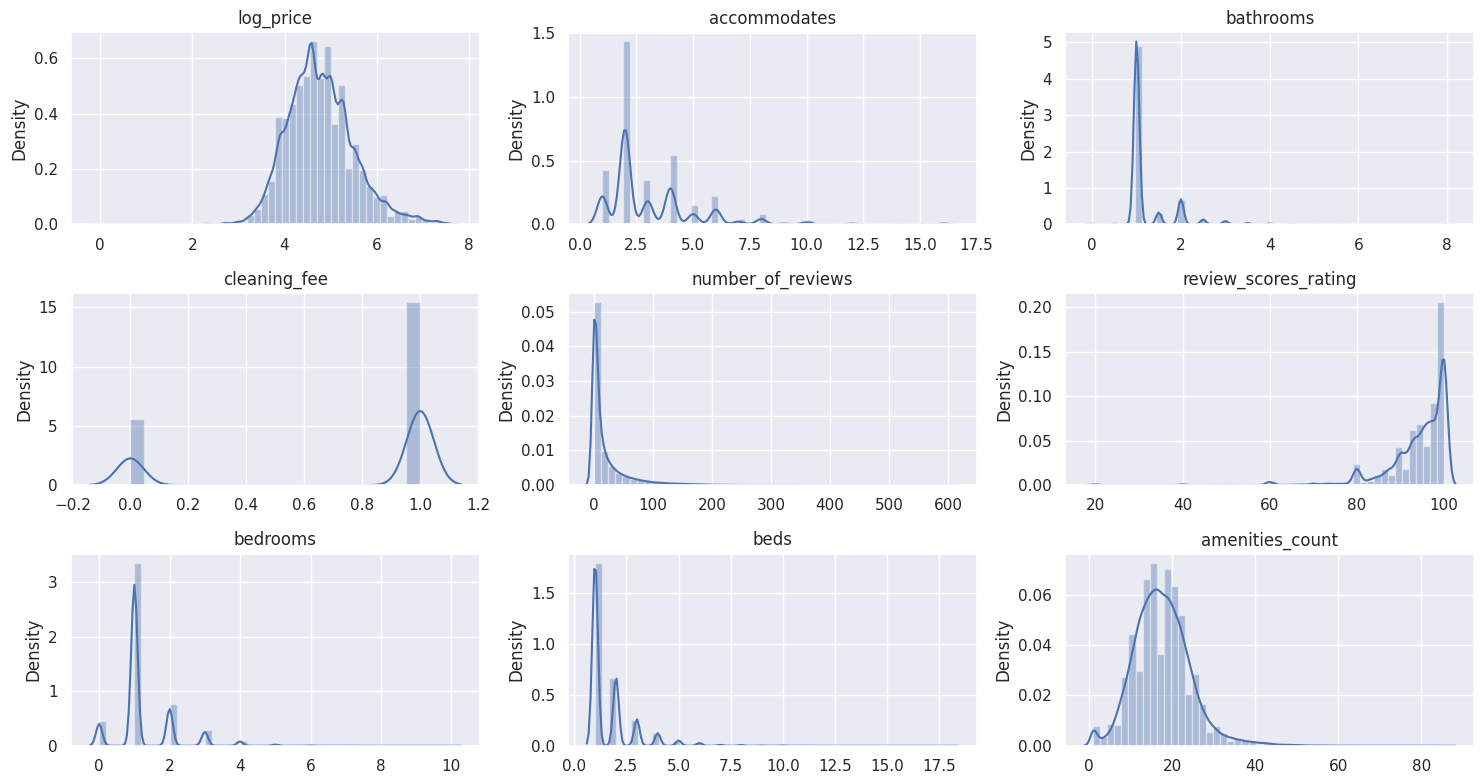

In [63]:
columns = 3

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(filtered_df[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()


**Distribución de log_price**

La variable log_price presenta una distribución simétrica. Esto implica que los valores de log_price están distribuidos de manera uniforme alrededor de la media, con una cantidad similar de valores en ambos lados de la media. La simetría en log_price sugiere que:

* Los precios logarítmicos de los alojamientos son bastante consistentes y equilibrados.
* No hay presencia significativa de valores atípicos o extremos en ninguno de los

---

**Distribucion de accommodates, bathrooms, bedrooms, number of reviews, beds y amenities**

Muestra una distribución asimétrica con una cola hacia la derecha (sesgo positivo). Esto significa que:

* La mayoría de los alojamientos tienen un número relativamente bajo de estas variables, mientras que hay unos pocos alojamientos con un número muy alto.
La media será mayor que la mediana debido a la presencia de valores extremadamente altos.


In [64]:
#Cargamos el mapa base.
f = folium.Figure(width=1000, height=500)
folium_hmap = folium.Map(location=[39, -99],
                        zoom_start=4,
                        tiles="OpenStreetMap").add_to(f)

#El pluggin de HM previamente importado
hm_wide = HeatMap( list(zip(df['latitude'], df['longitude'], df['id'])),
                   min_opacity=0.8,
                   radius=10, blur=6,
                   max_zoom=4,
                 )

#Mostrarlo en el mapa
folium_hmap.add_child(hm_wide)

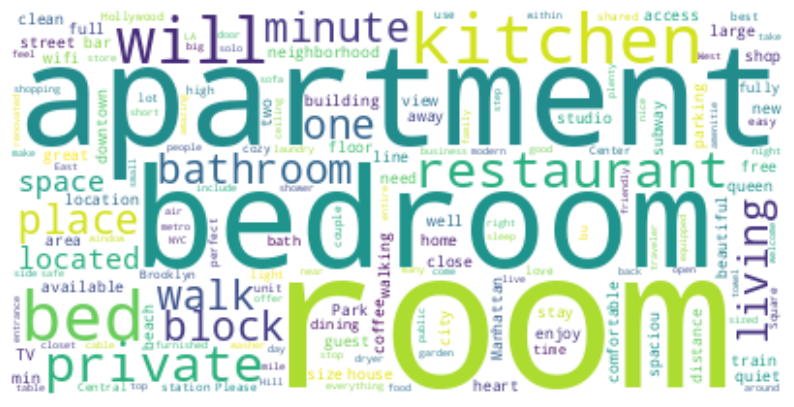

In [65]:
# Uno todos los titulos en un solo string
text1 = " ".join(description for description in df.description)

# Creo una nube de palabras
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text1)

# muestro la nube de palabras
plt.figure(figsize = (10,20))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

---
**Que ciudad ofrece mas alojamientos en AirBNB?**


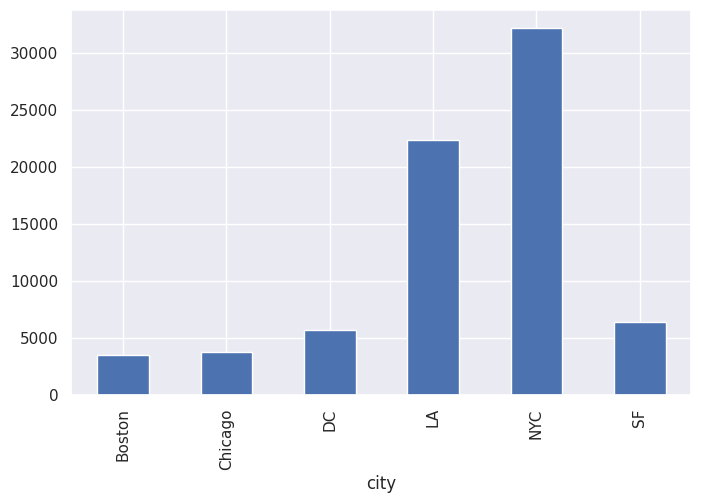

In [66]:
plt.figure(figsize = (8,5))
df.groupby("city").size().plot(kind="bar");

---
**Que ciudad tiene la media del precio mas baja? Cual tiene la mas alta?**

<ipython-input-67-99ba5e1f737d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x="log_price", y="city", data=mean_log_price_by_city, palette="Blues")


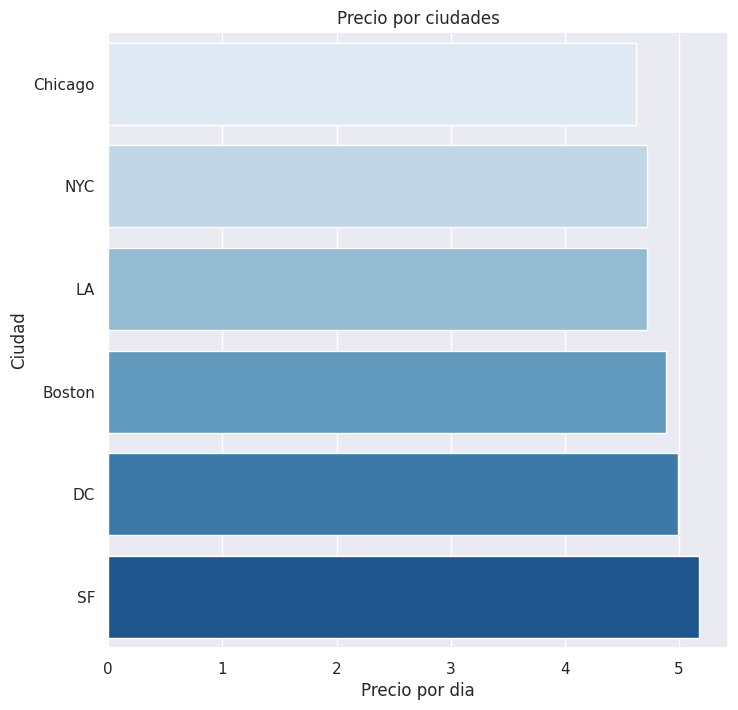

In [67]:
# Agrupar por la columna 'city' y calcular la media de 'log_price'
mean_log_price_by_city = df.groupby('city')['log_price'].mean().reset_index()

# Ordenar el DataFrame por 'mean_log_price' de mayor a menor
mean_log_price_by_city = mean_log_price_by_city.sort_values(by='log_price', ascending=True)

sns.set(rc={'figure.figsize':(8,8)})
sns.set(font_scale = 1)
plot = sns.barplot(x="log_price", y="city", data=mean_log_price_by_city, palette="Blues")
plot.set(xlabel='Precio por dia', ylabel='Ciudad')
plot.set_title('Precio por ciudades');

---
**Como varia el precio en base a la cantidad de dormitorios?**

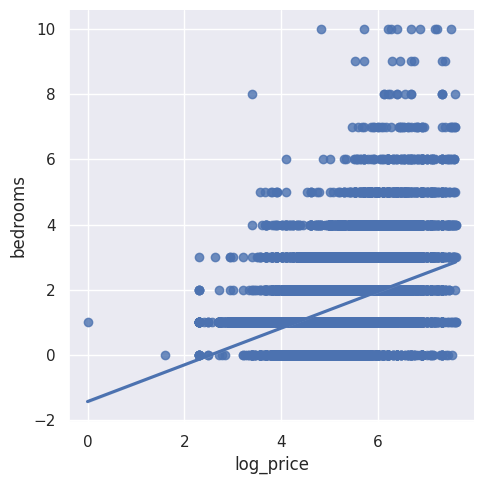

In [68]:
sns.lmplot(y='bedrooms', x='log_price', data=df, fit_reg=True)

el precio de los alojamientos con más dormitorios tiende a tener precios más elevados. Pero esta correlación es moderada ya que contamos con casos donde esta regla no aplica.

---
**Cual es la ciudad que cuenta con mayor cantidad de reviews?**

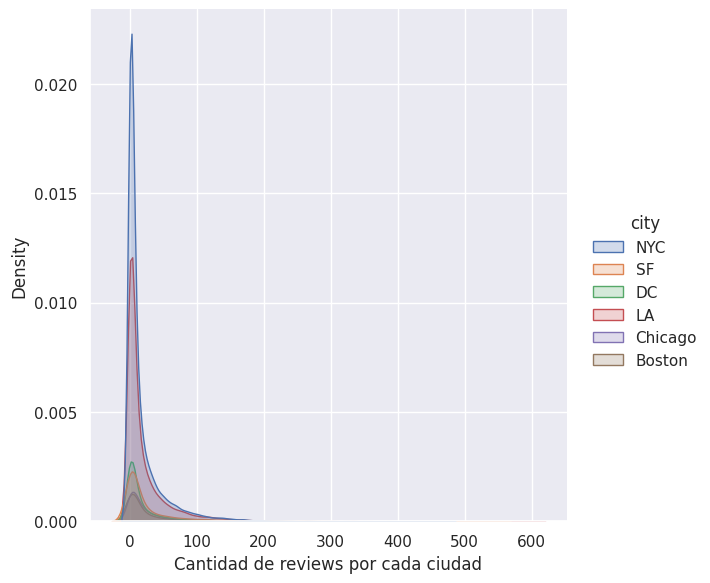

In [73]:
sns.set(font_scale = 1)
sns.displot(df, x="number_of_reviews", hue="city", kind="kde", fill=True, height=6, aspect=1)
plt.xlabel("Cantidad de reviews por cada ciudad");

---
**Cual es la ciudad que cuenta con mayor cantidad de reviews positivas?**

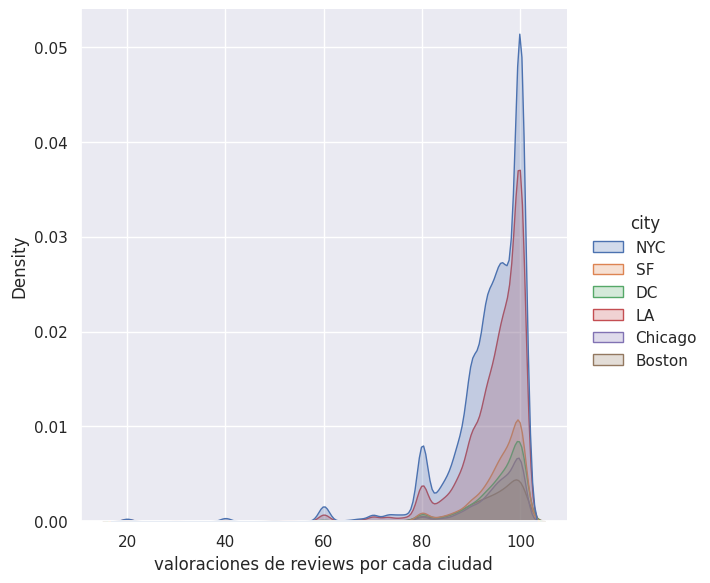

In [74]:
sns.set(font_scale = 1)
sns.displot(df, x="review_scores_rating", hue="city", kind="kde", fill=True, height=6, aspect=1)
plt.xlabel("valoraciones de reviews por cada ciudad");

## Conclusiones finales

**Recomendaciones**

* Como un primer análisis al dataset trabajado, encontramos que los alojamientos con mayor cantidad reviews positivas se encuentran en Nueva York y San Francisco. Considerando que Nueva York es una de las ciudades con la media del precio de alojamiento más bajas, es una gran opción para buscar un alojamiento.

* Al analizar la correlación entre los diferentes factores, se logró identificar que la cantidad de amenities tiene una correlación baja pero positiva con el precio. Esto sugiere que más amenities pueden estar ligeramente asociadas con precios más altos, pero esta relación no es fuerte.
Por este motivo pueden haber alojamientos con más amenities con precios iguales o levemente superiores a alojamientos sin amenities.

* El precio no tiene una relación significativa con el número de reseñas, lo que llevaria a recomendar a un persona que se este iniciando en la busqueda de alquileres buscar alojamientos con mayor numero de reseñas.